In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal = gchop.center(gal)
rvir = 297.470
gal = gchop.star_align(gal, r_cut=0.1*rvir)

In [4]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,-195699.620206,290.293111,-195409.327095,6.267166,-1.894153,-0.820925
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,-196176.962277,274.782915,-195902.179362,1.531441,-3.975916,1.472102
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,-195152.120168,193.699612,-194958.420557,-1.132945,5.869943,-3.448075
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,-194695.767625,62.113089,-194633.654536,-1.800299,3.384044,-1.208809
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,-195703.942688,314.128285,-195389.814402,5.662575,-5.977037,2.726944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,-85.899749,291.965507,-178.219934,-113.321459,-40.698785,-124.733209,0.0,-17314.963254,15028.258726,-2286.704528,-43671.129141,9481.591579,36581.972506
272643,gas,2,1.436841e+06,-155.732884,170.206676,-164.665238,-93.017512,-28.445627,-32.347611,0.0,-20910.620132,5253.889589,-15656.730543,-10189.785225,10279.164005,20262.120986
272644,gas,2,1.690580e+06,-116.936374,277.722266,-180.365217,-113.908933,-77.286989,-97.464865,0.0,-17358.735183,14223.961789,-3134.773394,-41008.047790,9148.021413,40672.707219
272645,gas,2,1.210975e+06,-153.286862,-87.825986,160.681922,-74.877268,28.624862,72.765247,0.0,-23427.833806,5860.384564,-17567.449242,-10990.177333,-877.466960,-10963.985096


In [5]:
dfs = pd.read_pickle('df_stars_gal394242_rvir.pkl')

In [6]:
print(len(gal.stars.x))
print(len(dfs.lab_th))

37393
37393


In [7]:
dfs

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,stars,0,9.867470e+05,135.738559,-160.160626,-15.369098,-56.741920,57.947940,121.877589,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
37389,stars,0,8.290853e+05,14.748290,15.584324,-5.206648,-6.194351,263.651947,313.783409,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
37390,stars,0,1.004103e+06,16.885028,56.265101,-2.875864,-43.605196,304.321445,11.364916,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
37391,stars,0,1.526682e+06,270.481924,-80.307674,15.246717,-89.287180,-51.203767,-23.223115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0


In [8]:
dfs.isnull().sum()

ptype               0
ptypev              0
m                   0
x                   0
y                   0
z                   0
vx                  0
vy                  0
vz                  0
softening           0
potential           0
kinetic_energy      0
total_energy        0
Jx                  0
Jy                  0
Jz                  0
lab_th            110
lab_ab            110
lab_cr            110
lab_km            110
lab_km3           110
lab_km4           110
lab_gmm           110
lab_gmm3          110
lab_gmm4          110
lab_agmm          110
dtype: int64

In [9]:
dfs2 = dfs[dfs['lab_th'].notna()]
print(len(dfs2.lab_th))

37283


# Analisis Confusion Matrix (% Particulas)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Abadi vs Threshold

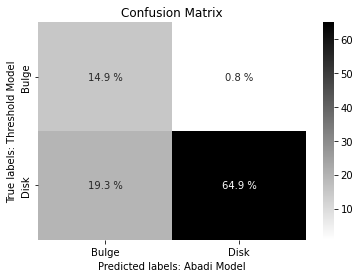

In [11]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_th
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_xlabel('Predicted labels: Abadi Model');ax.set_ylabel('True labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

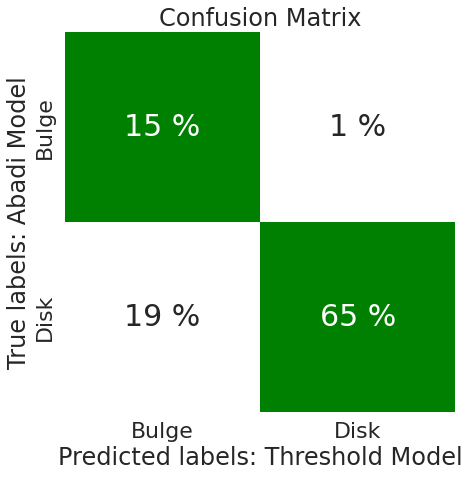

In [12]:
cm = cm_per
sns.set(font_scale=2)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[0, 1], [1, 0]], cmap=sns.color_palette(['green', 'white'], as_cmap=True),
                 annot=[[f"{cm[0][0]:.0f}", f"{cm[0][1]:.0f}"], [f"{cm[1][0]:.0f}", f"{cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: Threshold Model');ax.set_ylabel('True labels: Abadi Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

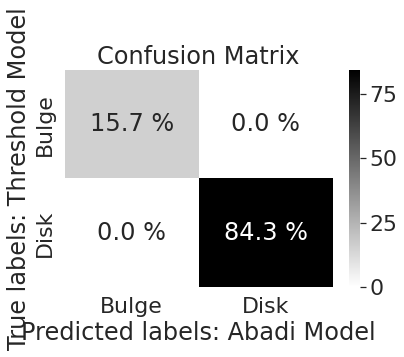

In [13]:
y_tue=dfs2.lab_th
y_pred=dfs2.lab_ab
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: Abadi Model');ax.set_ylabel('True labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

<AxesSubplot:xlabel='eps', ylabel='Density'>

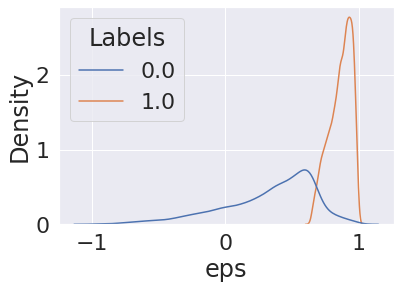

In [14]:
gal.plot.circ_kde("eps",labels=dfs2.lab_gmm)

## Abadi vs KMeans

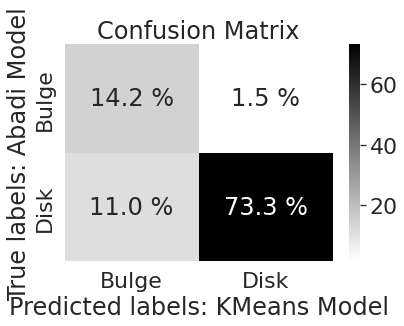

In [15]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_km
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)
ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: KMeans Model');ax.set_ylabel('True labels: Abadi Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk'])
ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

## Abadi vs JE-Histogram (Critiani)

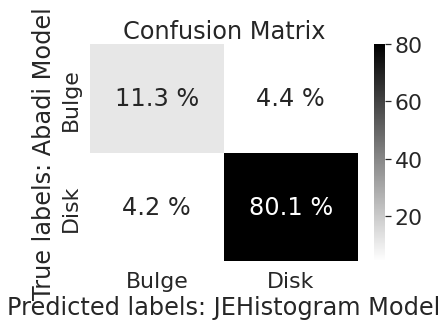

In [16]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_cr
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: JEHistogram Model');ax.set_ylabel('True labels: Abadi Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

## Confusion Materix All models (2 components)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

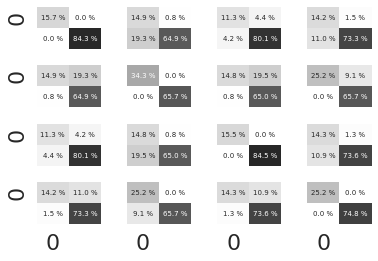

In [17]:
def plotter(y_true,y_pred,ax):
    #y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
    cm = confusion_matrix(y_true, y_pred); cm_per = cm*100/len(y_true)
    sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', annot_kws={"size": 7},
                vmin=0, vmax=100, center=50, cbar=False, ax=ax)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    return ax



fig,axes = plt.subplots(4, 4, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
#axes
ax1=axes[0,0]; ax2=axes[0,1]; ax3=axes[0,2]; ax4=axes[0,3]#; ax5=axes[0,4]
ax6=axes[1,0]; ax7=axes[1,1]; ax8=axes[1,2]; ax9=axes[1,3]#; ax10=axes[1,4]
ax11=axes[2,0]; ax12=axes[2,1]; ax13=axes[2,2]; ax14=axes[2,3]#; ax15=axes[2,4]
ax16=axes[3,0]; ax17=axes[3,1]; ax18=axes[3,2]; ax19=axes[3,3]#; ax20=axes[3,4]
#ax21=axes[4,0]; ax22=axes[4,1]; ax23=axes[4,2]; ax24=axes[4,3]; ax25=axes[4,4]

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax1)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax2)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax3)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax4)


############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax6)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax7)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax8)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax9)


############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax11)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax12)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax13)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax14)


############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax16)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax17)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax18)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax19)


########################################## 
#Tick-label
ax16.xaxis.set_ticklabels(['B', 'D'])
ax16.yaxis.set_ticklabels(['B', 'D']);

#Title
ax1.set_title('Abadi', fontsize=10)
ax2.set_title('Threshold', fontsize=10)
ax3.set_title('Cristiani', fontsize=10)
ax4.set_title('KMeans', fontsize=10)
#ax5.set_title('GMM', fontsize=10)
ax1.set_ylabel('Abadi', fontsize=10)
ax6.set_ylabel('Threshold', fontsize=10) 
ax11.set_ylabel('Cristiani', fontsize=10) 
ax16.set_ylabel('KMeans', fontsize=10) 
#ax21.set_ylabel('GMM', fontsize=10) 

#cbar_ax = fig.add_axes([1.1, .3, .03, .4])


#fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=cbar_ax )
fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=axes[:,3])



#plt.savefig('gchop_plots/matrix.png', dpi=200)

##  Confusion Matrix: 3comp

In [ ]:
#######km vs km
ax= plt.subplot()
y_true=dfs2.lab_km
y_pred=dfs2.lab_km
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax,  vmin=0, vmax=100, center=50)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: KMeans ');ax.set_ylabel('True labels: KMeans'); 
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bulge','Disk'])
ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

In [ ]:
#######km vs km+3
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_km
y_pred=dfs2.lab_km3
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax,  vmin=0, vmax=100, center=50)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: KMeans+3 ');ax.set_ylabel('True labels: KMeans'); 
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bulge', ' Thin Disk', 'Thick Disk'])
ax.yaxis.set_ticklabels(['Bulge', 'Disk', 'NaN']);


# El 74% de las particulas estelares del disco-km, estan divididas en disco fino y gruso de km+3.
# El 26% de las particulas estelares del bulge-km, estan divididas en disco grueso y bulge de km+3


In [ ]:
#######km+3 vs gmm+3
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_km3
y_pred=dfs2.lab_gmm3
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
#sns.heatmap(cm,annot=True, cmap='binary', fmt='g', ax=ax)
sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax,  vmin=0, vmax=100, center=50)
for t in ax.texts: t.set_text(t.get_text() + " %")
    
ax.set_xlabel('Predicted labels: GMM+3 ');ax.set_ylabel('True labels: KMeans+3'); 
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bulge', ' Thin Disk', 'Thick Disk'])
ax.yaxis.set_ticklabels(['Bulge', ' Thin Disk', 'Thick Disk']);


## Confusion Matrix 4 comp

In [ ]:
#######km+4 vs gmm+4 vs agmm

def plotter(y_true,y_pred,ax):
    #y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
    cm = confusion_matrix(y_true, y_pred); cm_per = cm*100/len(y_true)
    sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', annot_kws={"size": 5},
                vmin=0, vmax=100, center=50, cbar=False, ax=ax)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    return ax



fig,axes = plt.subplots(3, 3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
#axes
ax1=axes[0,0]; ax2=axes[0,1]; ax3=axes[0,2];
ax6=axes[1,0]; ax7=axes[1,1]; ax8=axes[1,2]; 
ax11=axes[2,0]; ax12=axes[2,1]; ax13=axes[2,2]; 


############ Fila 1 ##############################    
y_true=dfs2.lab_km4; y_pred=dfs2.lab_km4
plotter(y_true, y_pred, ax1)

y_true=dfs2.lab_km4; y_pred=dfs2.lab_gmm4
plotter(y_true, y_pred, ax2)

y_true=dfs2.lab_km4; y_pred=dfs2.lab_agmm
plotter(y_true, y_pred, ax3)
    
############ Fila 2 ############################## 
y_true=dfs2.lab_gmm4; y_pred=dfs2.lab_km4
plotter(y_true, y_pred, ax6)

y_true=dfs2.lab_gmm4; y_pred=dfs2.lab_gmm4
plotter(y_true, y_pred, ax7)

y_true=dfs2.lab_gmm4; y_pred=dfs2.lab_agmm
plotter(y_true, y_pred, ax8)

############ Fila 3 ##############################   
y_true=dfs2.lab_agmm; y_pred=dfs2.lab_km4
plotter(y_true, y_pred, ax11)

y_true=dfs2.lab_agmm; y_pred=dfs2.lab_gmm4
plotter(y_true, y_pred, ax12)

y_true=dfs2.lab_agmm; y_pred=dfs2.lab_agmm
plotter(y_true, y_pred, ax13)


########################################## 
#Tick-label
ax11.xaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax12.xaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax13.xaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax1.yaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8);
ax6.yaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)
ax11.yaxis.set_ticklabels(['SH', 'B', 'CD', 'WD'], fontsize=8)

#Title
ax1.set_title('KM+4', fontsize=10)
ax2.set_title('GMM+4', fontsize=10)
ax3.set_title('AGMM', fontsize=10)
ax1.set_ylabel('KM+4', fontsize=10)
ax6.set_ylabel('GMM+4', fontsize=10) 
ax11.set_ylabel('AGMM', fontsize=10)  

#cbar_ax = fig.add_axes([1.1, .3, .03, .4])


#fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=cbar_ax )
#fig.colorbar(ax1.pcolormesh(cm_per, cmap='binary'), ax=axes[:,2])


#plt.savefig('gchop_plots/matrix+4.png', dpi=200)

In [ ]:
gal.plot.circ_kde("eps",labels=dfs2.lab_agmm)